In [1]:
import xarray as xr
import matplotlib.cm as cm
import matplotlib.pylab as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import RectBivariateSpline

In [7]:
path = "/home/jorge/tsunami-warning/dataset/batimetrias/"

## Nombres batimetrias.

In [8]:
mod0 = 'L0_G'
mod1 = 'L1_C'
mod2 = 'L1_V'
mod3 = 'L2_C'
mod4 = 'L2_V'
mod5 = 'L3_C'
mod6 = 'L3_V'

In [9]:
mod  = mod6
base = xr.open_dataset(path+mod+'.grd') 
for i in base.variables.keys():
    print(i)

x
y
z


In [5]:
lon = base.variables['x'][:].data
lat = base.variables['y'][:].data
grd = base.variables['z'][:].data
base_inter = RectBivariateSpline(lat,lon,grd)
c_agua = plt.cm.Blues_r(np.linspace(0,0.5,128))
c_terr = plt.cm.copper(np.linspace(0.25,0.75,128))
cols   = np.vstack((c_agua, c_terr))
cmap   = cm.colors.LinearSegmentedColormap.from_list("q", cols)

In [6]:
print('lat max:',lat.max())
print('lat min:',lat.min())
print('lon max:',lon.max())
print('lon min:',lon.min())

lat max: -33.00263621012367
lat min: -33.051529439290334
lon max: 288.4765218098964
lon min: 288.360961914063


## Gráfico para ubicar boyas.
En este caso se esta trabajando con las batimetrias de coquimbo y valpo-viña, activar o configurar figsize según corresponda

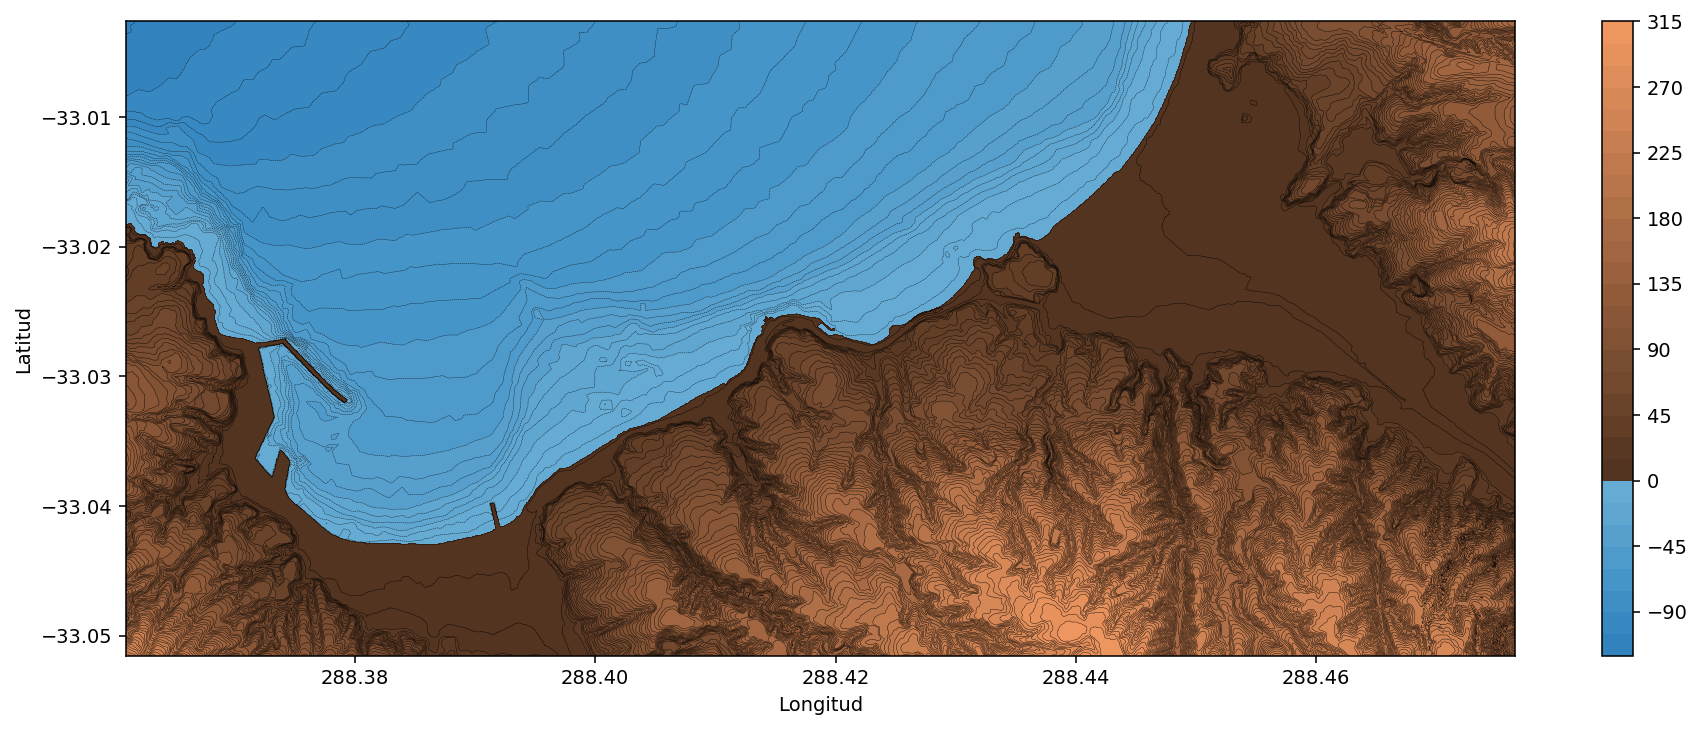

In [13]:

%matplotlib notebook


#fig = plt.figure(figsize=(10,14), dpi=140)# coquimbo
fig = plt.figure(figsize=(16,6), dpi=140)# valpo

ax = plt.gca()


plt.contour(lon,lat,grd, 100, linewidths=0.2, colors='k')
plt.contourf(lon,lat,grd, 30,cmap=cmap,
                vmax=abs(grd).max(), vmin=-abs(grd).max(),zorder =1)

plt.colorbar()  # draw colorbar
#plt.title('Batimetria Bahia Coquimbo' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
pos = []          
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ppx, ppy = zip(*pos)                          
    plt.scatter(ppx,ppy,s=2,c='r',marker='x');     
    plt.draw()                                    
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [21]:
#pos= np.loadtxt(path+'boyas/boyasValpo.txt')

## Vizualiza boyas seleccionadas
En el siguiente gráfico se visualiza las boyas y guarda la imagen

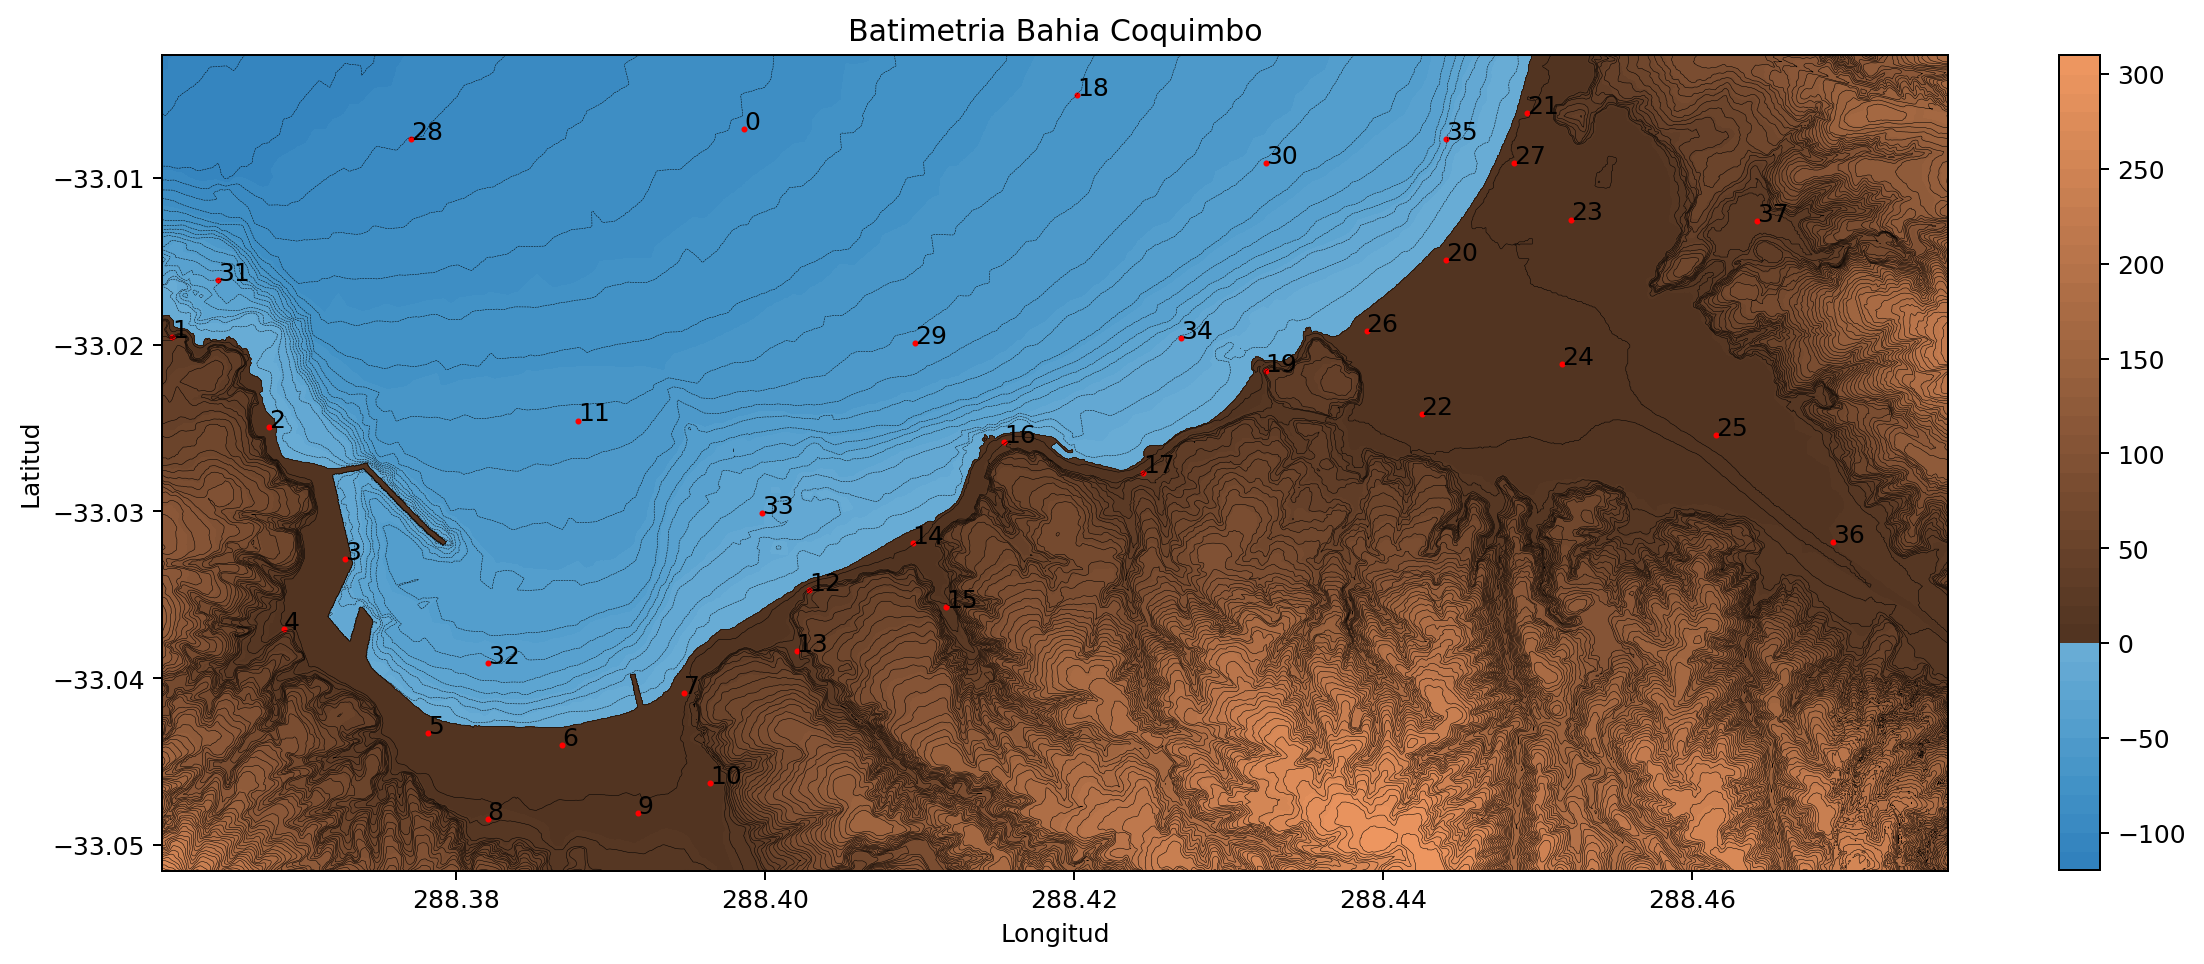

In [22]:
%matplotlib inline
io = 0
#fig = plt.figure(figsize=(10,14), dpi=140)# coquimbo
fig = plt.figure(figsize=(16,6), dpi=180)# valpo

ax = plt.gca()
#ax.invert_yaxis()

plt.contour(lon,lat,grd, 80, linewidths=0.2, colors='k')
plt.contourf(lon,lat,grd, 50,cmap=cmap,
                vmax=abs(grd).max(), vmin=-abs(grd).max(),zorder =1)

plt.colorbar()  # draw colorbar

for i in range(0,len(pos)):
    plt.scatter(pos[i][0], pos[i][1], s=2, color='red')
    plt.annotate(str(i+io), (pos[i][0], pos[i][1]))
plt.title('Batimetria Bahia Valpo-Viña' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig(path+mod+'dat'+'.png', dpi=100)
plt.show()


## Guardar .dat
Se guarda archivo .dat con las la cantidad y ubicación de las boyas seleccionadas.

In [ ]:
boyas=open(mod+'.dat','w+')
boyas.write(str(len(pos))+'\n')
for i in range(0,len(pos)):
    boyas.write(str(round(pos[i][0],6))+' '+str(round(pos[i][1],6))+'\n')
boyas.close()